In [276]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC


EDA

In [277]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [278]:
train.shape

(891, 12)

In [279]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [281]:
(train['Age'].isna().sum()/len(train['Age']))*100

19.865319865319865

In [282]:
(train['Cabin'].isna().sum()/len(train['Cabin']))*100


77.10437710437711

In [283]:
(train['Embarked'].isna().sum()/len(train['Embarked']))*100

0.22446689113355783

In [284]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

/Users/viscenzapearl/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

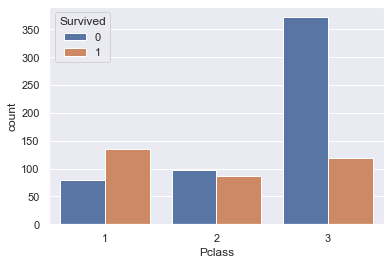

In [285]:
sns.countplot('Pclass', hue='Survived', data=train)


In [286]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=False)

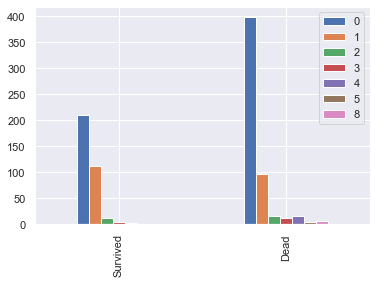

In [287]:
bar_chart('SibSp')

In [288]:
#sns.violinplot(x="Sex", y="Age", hue="Survived",data=train, split=True)

Encodage des variables categorielles 

In [289]:
#train.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, #inplace=True)
train.replace({'Sex': {'male': 0, 'female': 1}}, inplace = True)


In [290]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,NaN,Q


In [291]:
train.drop('Cabin', axis=1, inplace=True)


In [292]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


idk


In [294]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [295]:

train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)


In [296]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [297]:
x = train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

In [298]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [299]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [300]:
lr = LogisticRegression()


In [301]:
lr.fit(x_train, y_train)


/Users/viscenzapearl/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [302]:
print(X.shape, X_train.shape, X_test.shape)


(891, 9) (712, 9) (179, 9)


In [303]:
predict = lr.predict(x_test)


In [304]:
pd.DataFrame(confusion_matrix(y_test, predict), columns=[
             'Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])


,Predicted No,Predicted Yes
Actual No,156,19
Actual Yes,63,57


In [305]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       175
           1       0.75      0.47      0.58       120

    accuracy                           0.72       295
   macro avg       0.73      0.68      0.69       295
weighted avg       0.73      0.72      0.71       295

